# Set up

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import os.path as path

root_path = "/content/drive/MyDrive/DFS/pu/thesis/the_new_one"
data_path = path.join(root_path, 'data')

!ls $data_path

df_aspect.csv		 df_preprocess.csv		  filtered_data.csv
df_aspect_stopwords.csv  df_preprocess_stopwords.csv	  image
df_none.csv		 df_with_aspect_sentiment.csv	  old
df_none_none.csv	 df_with_aspect_sentiment.gsheet  short_data.csv


# Load data

In [ ]:
import pandas as pd

df = pd.read_csv(path.join(data_path, 'filtered_data.csv'))
df

,place_id,link,name,status,location,overall_rating,price,rating,review_time,comment,...,subpremise,sublocality_level_1,premise,administrative_area_level_3,point_of_interest,locality,Đồ ăn,Dịch vụ,Bầu không khí,Loại hình bữa ăn
0,ChIJp1UGz2YpdTERL109bi26Azs,https://maps.google.com/?cid=42524471774536901...,Cơm niêu KOMBO - L5-08 TTTM Parcmall,OPERATIONAL,"L5 08 TTTM Parcmall, Phường 15",3.7,Vừa,4.0,2024-09-01,"Phần cơm trung bình 90k/phần, nước trung bình ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ChIJp1UGz2YpdTERL109bi26Azs,https://maps.google.com/?cid=42524471774536901...,Cơm niêu KOMBO - L5-08 TTTM Parcmall,OPERATIONAL,"L5 08 TTTM Parcmall, Phường 15",3.7,Vừa,5.0,2024-09-01,"Cơm lạ miệng, có lớp cơm cháy giòn giòn ăn ngo...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ChIJTYxwqQQpdTERu-toZpUuJhY,https://maps.google.com/?cid=15960143371525764...,Trịnh trần phương tuấn,OPERATIONAL,"RJFH+6VM, Phường 15",4.2,NaN,5.0,2019-09-01,Tuyệt vời,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ChIJNd_JkGIpdTERXRtR4acBq-w,https://maps.google.com/?cid=17053726234519870...,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,NaN,5.0,2024-11-01,🌟🌟🌟🌟🌟\n\nMình rất hài lòng khi ghé Domino's Pi...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ChIJNd_JkGIpdTERXRtR4acBq-w,https://maps.google.com/?cid=17053726234519870...,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,NaN,4.0,2024-11-01,"Cỡ 9 có thể 2ng ăn ,sức ăn mạnh chắc 1 người ăn.",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26787,ChIJ-ZE4DgApdTERS0vMWv7kdJQ,https://www.google.com/maps/place/S%E1%BB%8Fi+...,Sỏi Thái - Gò Vấp,OPERATIONAL,"Sỏi Thái - Gò Vấp, 246, Đ. Lê Đức Thọ, Gò Vấp",4.9,200-300,5.0,2024-11-01,"Quán mát, thoáng, Phục vụ tốt",...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5,5.0,NaN
26788,ChIJ-ZE4DgApdTERS0vMWv7kdJQ,https://www.google.com/maps/place/S%E1%BB%8Fi+...,Sỏi Thái - Gò Vấp,OPERATIONAL,"Sỏi Thái - Gò Vấp, 246, Đ. Lê Đức Thọ, Gò Vấp",4.9,200-300,5.0,2024-11-01,"Không gian rộng , thoáng mát , nv nhiệt tình",...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5,5.0,NaN
26789,ChIJZwyNWREpdTERLCUiK91rmSM,https://www.google.com/maps/place/BeefSteak+10...,BeefSteak 100gram,OPERATIONAL,"BeefSteak 100gram, 221/5, Đ. Lê Đức Thọ, Gò Vấp",4.5,1-100.000,4.0,2024-11-01,"Đồ ăn ngon , giá phải chăng (2 ng 4 món hết 20...",...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5,5.0,NaN
26790,ChIJLdqfCwYpdTERHe9GR3p-jmg,https://www.google.com/maps/place/Chay+Mandala...,Chay Mandala - Ẩm thực chay và Lẩu chay,OPERATIONAL,"Chay Mandala - Ẩm thực chay và Lẩu chay, 44K, ...",4.6,1-100.000,5.0,2024-11-01,"Lẩu thái chay rất ngon, sạch sẽ, có nhiều rau ...",...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5,5.0,Bữa tối


In [ ]:
df.columns

Index(['place_id', 'link', 'name', 'status', 'location', 'overall_rating',
       'price', 'rating', 'review_time', 'comment', 'street_number', 'route',
       'area', 'plus_code', 'neighborhood', 'subpremise',
       'sublocality_level_1', 'premise', 'administrative_area_level_3',
       'point_of_interest', 'locality', 'Đồ ăn', 'Dịch vụ', 'Bầu không khí',
       'Loại hình bữa ăn'],
      dtype='object')

In [ ]:
df.loc[0]

,0
place_id,ChIJp1UGz2YpdTERL109bi26Azs
link,https://maps.google.com/?cid=42524471774536901...
name,Cơm niêu KOMBO - L5-08 TTTM Parcmall
status,OPERATIONAL
location,"L5 08 TTTM Parcmall, Phường 15"
overall_rating,3.7
price,Vừa
rating,4.0
review_time,2024-09-01
comment,"Phần cơm trung bình 90k/phần, nước trung bình ..."


In [ ]:
df = df.drop(columns=['plus_code',
                      'neighborhood',
                      'subpremise',
                      'sublocality_level_1',
                      'premise',
                      'administrative_area_level_3',
                      'point_of_interest',
                      'locality'])
df

,place_id,link,name,status,location,overall_rating,price,rating,review_time,comment,street_number,route,area,Đồ ăn,Dịch vụ,Bầu không khí,Loại hình bữa ăn
0,ChIJp1UGz2YpdTERL109bi26Azs,https://maps.google.com/?cid=42524471774536901...,Cơm niêu KOMBO - L5-08 TTTM Parcmall,OPERATIONAL,"L5 08 TTTM Parcmall, Phường 15",3.7,Vừa,4.0,2024-09-01,"Phần cơm trung bình 90k/phần, nước trung bình ...",L5,08 TTTM Parcmall,Tân Bình,NaN,NaN,NaN,NaN
1,ChIJp1UGz2YpdTERL109bi26Azs,https://maps.google.com/?cid=42524471774536901...,Cơm niêu KOMBO - L5-08 TTTM Parcmall,OPERATIONAL,"L5 08 TTTM Parcmall, Phường 15",3.7,Vừa,5.0,2024-09-01,"Cơm lạ miệng, có lớp cơm cháy giòn giòn ăn ngo...",L5,08 TTTM Parcmall,Tân Bình,NaN,NaN,NaN,NaN
2,ChIJTYxwqQQpdTERu-toZpUuJhY,https://maps.google.com/?cid=15960143371525764...,Trịnh trần phương tuấn,OPERATIONAL,"RJFH+6VM, Phường 15",4.2,NaN,5.0,2019-09-01,Tuyệt vời,NaN,NaN,Tân Bình,NaN,NaN,NaN,NaN
3,ChIJNd_JkGIpdTERXRtR4acBq-w,https://maps.google.com/?cid=17053726234519870...,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,NaN,5.0,2024-11-01,🌟🌟🌟🌟🌟\n\nMình rất hài lòng khi ghé Domino's Pi...,7,Phan Huy Ích,Tân Bình,NaN,NaN,NaN,NaN
4,ChIJNd_JkGIpdTERXRtR4acBq-w,https://maps.google.com/?cid=17053726234519870...,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,NaN,4.0,2024-11-01,"Cỡ 9 có thể 2ng ăn ,sức ăn mạnh chắc 1 người ăn.",7,Phan Huy Ích,Tân Bình,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26787,ChIJ-ZE4DgApdTERS0vMWv7kdJQ,https://www.google.com/maps/place/S%E1%BB%8Fi+...,Sỏi Thái - Gò Vấp,OPERATIONAL,"Sỏi Thái - Gò Vấp, 246, Đ. Lê Đức Thọ, Gò Vấp",4.9,200-300,5.0,2024-11-01,"Quán mát, thoáng, Phục vụ tốt",246,Đ. Lê Đức Thọ,Gò Vấp,5.0,5,5.0,NaN
26788,ChIJ-ZE4DgApdTERS0vMWv7kdJQ,https://www.google.com/maps/place/S%E1%BB%8Fi+...,Sỏi Thái - Gò Vấp,OPERATIONAL,"Sỏi Thái - Gò Vấp, 246, Đ. Lê Đức Thọ, Gò Vấp",4.9,200-300,5.0,2024-11-01,"Không gian rộng , thoáng mát , nv nhiệt tình",246,Đ. Lê Đức Thọ,Gò Vấp,5.0,5,5.0,NaN
26789,ChIJZwyNWREpdTERLCUiK91rmSM,https://www.google.com/maps/place/BeefSteak+10...,BeefSteak 100gram,OPERATIONAL,"BeefSteak 100gram, 221/5, Đ. Lê Đức Thọ, Gò Vấp",4.5,1-100.000,4.0,2024-11-01,"Đồ ăn ngon , giá phải chăng (2 ng 4 món hết 20...",221/5,Đ. Lê Đức Thọ,Gò Vấp,4.0,5,5.0,NaN
26790,ChIJLdqfCwYpdTERHe9GR3p-jmg,https://www.google.com/maps/place/Chay+Mandala...,Chay Mandala - Ẩm thực chay và Lẩu chay,OPERATIONAL,"Chay Mandala - Ẩm thực chay và Lẩu chay, 44K, ...",4.6,1-100.000,5.0,2024-11-01,"Lẩu thái chay rất ngon, sạch sẽ, có nhiều rau ...",44K,Đ. Nguyễn Thị Đặng,Quận 12,5.0,5,5.0,Bữa tối


In [ ]:
# rename column
df.rename(columns={'Đồ ăn': 'a_food',
                   'Dịch vụ': 'a_service',
                   'Bầu không khí': 'a_atmosphere',
                   'Loại hình bữa ăn': 'type'},
          inplace=True, errors='raise')
df

,place_id,link,name,status,location,overall_rating,price,rating,review_time,comment,street_number,route,area,a_food,a_service,a_atmosphere,type
0,ChIJp1UGz2YpdTERL109bi26Azs,https://maps.google.com/?cid=42524471774536901...,Cơm niêu KOMBO - L5-08 TTTM Parcmall,OPERATIONAL,"L5 08 TTTM Parcmall, Phường 15",3.7,Vừa,4.0,2024-09-01,"Phần cơm trung bình 90k/phần, nước trung bình ...",L5,08 TTTM Parcmall,Tân Bình,NaN,NaN,NaN,NaN
1,ChIJp1UGz2YpdTERL109bi26Azs,https://maps.google.com/?cid=42524471774536901...,Cơm niêu KOMBO - L5-08 TTTM Parcmall,OPERATIONAL,"L5 08 TTTM Parcmall, Phường 15",3.7,Vừa,5.0,2024-09-01,"Cơm lạ miệng, có lớp cơm cháy giòn giòn ăn ngo...",L5,08 TTTM Parcmall,Tân Bình,NaN,NaN,NaN,NaN
2,ChIJTYxwqQQpdTERu-toZpUuJhY,https://maps.google.com/?cid=15960143371525764...,Trịnh trần phương tuấn,OPERATIONAL,"RJFH+6VM, Phường 15",4.2,NaN,5.0,2019-09-01,Tuyệt vời,NaN,NaN,Tân Bình,NaN,NaN,NaN,NaN
3,ChIJNd_JkGIpdTERXRtR4acBq-w,https://maps.google.com/?cid=17053726234519870...,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,NaN,5.0,2024-11-01,🌟🌟🌟🌟🌟\n\nMình rất hài lòng khi ghé Domino's Pi...,7,Phan Huy Ích,Tân Bình,NaN,NaN,NaN,NaN
4,ChIJNd_JkGIpdTERXRtR4acBq-w,https://maps.google.com/?cid=17053726234519870...,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,NaN,4.0,2024-11-01,"Cỡ 9 có thể 2ng ăn ,sức ăn mạnh chắc 1 người ăn.",7,Phan Huy Ích,Tân Bình,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26787,ChIJ-ZE4DgApdTERS0vMWv7kdJQ,https://www.google.com/maps/place/S%E1%BB%8Fi+...,Sỏi Thái - Gò Vấp,OPERATIONAL,"Sỏi Thái - Gò Vấp, 246, Đ. Lê Đức Thọ, Gò Vấp",4.9,200-300,5.0,2024-11-01,"Quán mát, thoáng, Phục vụ tốt",246,Đ. Lê Đức Thọ,Gò Vấp,5.0,5,5.0,NaN
26788,ChIJ-ZE4DgApdTERS0vMWv7kdJQ,https://www.google.com/maps/place/S%E1%BB%8Fi+...,Sỏi Thái - Gò Vấp,OPERATIONAL,"Sỏi Thái - Gò Vấp, 246, Đ. Lê Đức Thọ, Gò Vấp",4.9,200-300,5.0,2024-11-01,"Không gian rộng , thoáng mát , nv nhiệt tình",246,Đ. Lê Đức Thọ,Gò Vấp,5.0,5,5.0,NaN
26789,ChIJZwyNWREpdTERLCUiK91rmSM,https://www.google.com/maps/place/BeefSteak+10...,BeefSteak 100gram,OPERATIONAL,"BeefSteak 100gram, 221/5, Đ. Lê Đức Thọ, Gò Vấp",4.5,1-100.000,4.0,2024-11-01,"Đồ ăn ngon , giá phải chăng (2 ng 4 món hết 20...",221/5,Đ. Lê Đức Thọ,Gò Vấp,4.0,5,5.0,NaN
26790,ChIJLdqfCwYpdTERHe9GR3p-jmg,https://www.google.com/maps/place/Chay+Mandala...,Chay Mandala - Ẩm thực chay và Lẩu chay,OPERATIONAL,"Chay Mandala - Ẩm thực chay và Lẩu chay, 44K, ...",4.6,1-100.000,5.0,2024-11-01,"Lẩu thái chay rất ngon, sạch sẽ, có nhiều rau ...",44K,Đ. Nguyễn Thị Đặng,Quận 12,5.0,5,5.0,Bữa tối


In [ ]:
# describe data
print("Total restaurants:", df['place_id'].nunique())
print("Total reviews:", df.shape[0])

print("Min:", df.groupby('place_id')['comment'].count().min())
print("Max:", df.groupby('place_id')['comment'].count().max())

print("Mean:", df.groupby('place_id')['comment'].count().mean())
print("Median:", df.groupby('place_id')['comment'].count().median())
print("Std:", df.groupby('place_id')['comment'].count().std())


Total restaurants: 2835
Total reviews: 26792
Min: 1
Max: 263
Mean: 9.450440917107583
Median: 2.0
Std: 22.97999948828569


# Dataset filter
Đặt threshold => thêm bước filter giả sử 50 reviews per restaurant (try and error)

In [ ]:
df_filter = df.groupby('place_id').filter(lambda x: len(x) >= 20)
df_filter

,place_id,link,name,status,location,overall_rating,price,rating,review_time,comment,street_number,route,area,a_food,a_service,a_atmosphere,type
3,ChIJNd_JkGIpdTERXRtR4acBq-w,https://maps.google.com/?cid=17053726234519870...,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,NaN,5.0,2024-11-01,🌟🌟🌟🌟🌟\n\nMình rất hài lòng khi ghé Domino's Pi...,7,Phan Huy Ích,Tân Bình,NaN,NaN,NaN,NaN
4,ChIJNd_JkGIpdTERXRtR4acBq-w,https://maps.google.com/?cid=17053726234519870...,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,NaN,4.0,2024-11-01,"Cỡ 9 có thể 2ng ăn ,sức ăn mạnh chắc 1 người ăn.",7,Phan Huy Ích,Tân Bình,NaN,NaN,NaN,NaN
5,ChIJNd_JkGIpdTERXRtR4acBq-w,https://maps.google.com/?cid=17053726234519870...,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,100-200,1.0,2024-01-01,Ngồi chờ 30’ xong nhân viên ra báo bánh bị hư ...,7,Phan Huy Ích,Tân Bình,2.0,1,1.0,NaN
6,ChIJNd_JkGIpdTERXRtR4acBq-w,https://maps.google.com/?cid=17053726234519870...,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,100-200,5.0,2023-07-01,"Pizza ngon , phục vụ tận tình , không gian tho...",7,Phan Huy Ích,Tân Bình,5.0,5,5.0,NaN
7,ChIJNd_JkGIpdTERXRtR4acBq-w,https://maps.google.com/?cid=17053726234519870...,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,100-200,1.0,2023-08-01,Đây là cái bánh pizza phô mai bên phan huy ích...,7,Phan Huy Ích,Tân Bình,1.0,4,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26786,ChIJ-ZE4DgApdTERS0vMWv7kdJQ,https://www.google.com/maps/place/S%E1%BB%8Fi+...,Sỏi Thái - Gò Vấp,OPERATIONAL,"Sỏi Thái - Gò Vấp, 246, Đ. Lê Đức Thọ, Gò Vấp",4.9,200-300,5.0,2024-11-01,Quan sach đep ..nhan vien chu đáo...,246,Đ. Lê Đức Thọ,Gò Vấp,5.0,5,5.0,NaN
26787,ChIJ-ZE4DgApdTERS0vMWv7kdJQ,https://www.google.com/maps/place/S%E1%BB%8Fi+...,Sỏi Thái - Gò Vấp,OPERATIONAL,"Sỏi Thái - Gò Vấp, 246, Đ. Lê Đức Thọ, Gò Vấp",4.9,200-300,5.0,2024-11-01,"Quán mát, thoáng, Phục vụ tốt",246,Đ. Lê Đức Thọ,Gò Vấp,5.0,5,5.0,NaN
26788,ChIJ-ZE4DgApdTERS0vMWv7kdJQ,https://www.google.com/maps/place/S%E1%BB%8Fi+...,Sỏi Thái - Gò Vấp,OPERATIONAL,"Sỏi Thái - Gò Vấp, 246, Đ. Lê Đức Thọ, Gò Vấp",4.9,200-300,5.0,2024-11-01,"Không gian rộng , thoáng mát , nv nhiệt tình",246,Đ. Lê Đức Thọ,Gò Vấp,5.0,5,5.0,NaN
26789,ChIJZwyNWREpdTERLCUiK91rmSM,https://www.google.com/maps/place/BeefSteak+10...,BeefSteak 100gram,OPERATIONAL,"BeefSteak 100gram, 221/5, Đ. Lê Đức Thọ, Gò Vấp",4.5,1-100.000,4.0,2024-11-01,"Đồ ăn ngon , giá phải chăng (2 ng 4 món hết 20...",221/5,Đ. Lê Đức Thọ,Gò Vấp,4.0,5,5.0,NaN


In [ ]:
# describe data
print("Total restaurants:", df_filter['place_id'].nunique())
print("Total reviews:", df_filter.shape[0])

print("Min:", df_filter.groupby('place_id')['comment'].count().min())
print("Max:", df_filter.groupby('place_id')['comment'].count().max())

print("Mean:", df_filter.groupby('place_id')['comment'].count().mean())
print("Median:", df_filter.groupby('place_id')['comment'].count().median())
print("Std:", df_filter.groupby('place_id')['comment'].count().std())

Total restaurants: 315
Total reviews: 18060
Min: 20
Max: 263
Mean: 57.333333333333336
Median: 39.0
Std: 45.4827607854055


In [ ]:
for df in df_filter.groupby('place_id'):
    print(df)

Streaming output truncated to the last 5000 lines.
6513  ChIJLZ1_NgApdTERFEPwRWizOQQ   
6514  ChIJLZ1_NgApdTERFEPwRWizOQQ   
6515  ChIJLZ1_NgApdTERFEPwRWizOQQ   
6516  ChIJLZ1_NgApdTERFEPwRWizOQQ   
6517  ChIJLZ1_NgApdTERFEPwRWizOQQ   
6518  ChIJLZ1_NgApdTERFEPwRWizOQQ   
6519  ChIJLZ1_NgApdTERFEPwRWizOQQ   
6520  ChIJLZ1_NgApdTERFEPwRWizOQQ   
6521  ChIJLZ1_NgApdTERFEPwRWizOQQ   
6522  ChIJLZ1_NgApdTERFEPwRWizOQQ   
6523  ChIJLZ1_NgApdTERFEPwRWizOQQ   
6524  ChIJLZ1_NgApdTERFEPwRWizOQQ   
6525  ChIJLZ1_NgApdTERFEPwRWizOQQ   
6526  ChIJLZ1_NgApdTERFEPwRWizOQQ   
6527  ChIJLZ1_NgApdTERFEPwRWizOQQ   
6528  ChIJLZ1_NgApdTERFEPwRWizOQQ   
6529  ChIJLZ1_NgApdTERFEPwRWizOQQ   

                                                   link  \
6502  https://maps.google.com/?cid=30447171025556354...   
6503  https://maps.google.com/?cid=30447171025556354...   
6504  https://maps.google.com/?cid=30447171025556354...   
6505  https://maps.google.com/?cid=30447171025556354...   
6506  https://maps.googl

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-a33f2164e73c>", line 2, in <cell line: 0>
    print(df)
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/frame.py", line 1214, in __repr__
    return self.to_string(**repr_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/util/_decorators.py", line 333, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/frame.py", line 1375, in to_string
    with option_context("display.max_colwidth", max_colwidth):
  File "/usr/local/lib/python3.11/dist-packages/pandas/_config/config.py", line 488, in __exit__
    _set_option(pat, val, silent=True)
  File "/usr/local/lib/python3.11/dist-packages/pandas/_config/config.py", line None, in 

In [ ]:
df_filter[df_filter['place_id'] == 'ChIJF8uBUugpdTERl1DVk7K9nsk']

,place_id,link,name,status,location,overall_rating,price,rating,review_time,comment,street_number,route,area,a_food,a_service,a_atmosphere,type
19101,ChIJF8uBUugpdTERl1DVk7K9nsk,https://maps.google.com/?cid=14528258022625857...,Lẩu Mắm 71,OPERATIONAL,"32/3 Lê Văn Khương, Thới An",4.3,NaN,4.0,2024-10-01,Quán bình dân khá thú vị với món chim cút chiê...,32/3,Lê Văn Khương,Quận 12,NaN,NaN,NaN,NaN
19102,ChIJF8uBUugpdTERl1DVk7K9nsk,https://maps.google.com/?cid=14528258022625857...,Lẩu Mắm 71,OPERATIONAL,"32/3 Lê Văn Khương, Thới An",4.3,NaN,4.0,2024-10-01,"Quán cũng phải lâu năm lắm rồi, quay lại ăn vẫ...",32/3,Lê Văn Khương,Quận 12,NaN,NaN,NaN,NaN
19103,ChIJF8uBUugpdTERl1DVk7K9nsk,https://maps.google.com/?cid=14528258022625857...,Lẩu Mắm 71,OPERATIONAL,"32/3 Lê Văn Khương, Thới An",4.3,NaN,3.0,2024-08-01,Quán có không gian ngoài trời vỉa hè là chính ...,32/3,Lê Văn Khương,Quận 12,NaN,NaN,NaN,NaN
19104,ChIJF8uBUugpdTERl1DVk7K9nsk,https://maps.google.com/?cid=14528258022625857...,Lẩu Mắm 71,OPERATIONAL,"32/3 Lê Văn Khương, Thới An",4.3,NaN,1.0,2024-10-01,"Đồ ăn ok, ngon mà nhân viên pv k hài lòng lắm ...",32/3,Lê Văn Khương,Quận 12,NaN,NaN,NaN,NaN
19105,ChIJF8uBUugpdTERl1DVk7K9nsk,https://maps.google.com/?cid=14528258022625857...,Lẩu Mắm 71,OPERATIONAL,"32/3 Lê Văn Khương, Thới An",4.3,NaN,4.0,2024-09-01,"Bình dân học vụ, ngồi ăn cảm nhận không khí nh...",32/3,Lê Văn Khương,Quận 12,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19245,ChIJF8uBUugpdTERl1DVk7K9nsk,https://maps.google.com/?cid=14528258022625857...,Lẩu Mắm 71,OPERATIONAL,"32/3 Lê Văn Khương, Thới An",4.3,NaN,5.0,2017-10-01,Phải cố gắng! Thức ăn rất ngon,32/3,Lê Văn Khương,Quận 12,NaN,NaN,NaN,NaN
19246,ChIJF8uBUugpdTERl1DVk7K9nsk,https://maps.google.com/?cid=14528258022625857...,Lẩu Mắm 71,OPERATIONAL,"32/3 Lê Văn Khương, Thới An",4.3,NaN,4.0,2021-03-01,Ăn thử món ăn ngon và phản hồi,32/3,Lê Văn Khương,Quận 12,NaN,NaN,NaN,NaN
19247,ChIJF8uBUugpdTERl1DVk7K9nsk,https://maps.google.com/?cid=14528258022625857...,Lẩu Mắm 71,OPERATIONAL,"32/3 Lê Văn Khương, Thới An",4.3,NaN,5.0,2019-10-01,"Chim cút, chim cút, chim cút. Chim cút chiên g...",32/3,Lê Văn Khương,Quận 12,NaN,NaN,NaN,NaN
26702,ChIJF8uBUugpdTERl1DVk7K9nsk,NaN,Lẩu Mắm 71,OPERATIONAL,"Lẩu Mắm 71, 32/3, Lê Văn Khương, Quận 12",4.4,100-200,5.0,2024-04-01,"Món ăn ngon, khách quá đông nên đợi lâu",32/3,Lê Văn Khương,Quận 12,5.0,4,3.0,NaN


In [ ]:
df_filter[df_filter['link'].isna()]

,place_id,link,name,status,location,overall_rating,price,rating,review_time,comment,street_number,route,area,a_food,a_service,a_atmosphere,type
26702,ChIJF8uBUugpdTERl1DVk7K9nsk,NaN,Lẩu Mắm 71,OPERATIONAL,"Lẩu Mắm 71, 32/3, Lê Văn Khương, Quận 12",4.4,100-200,5.0,2024-04-01,"Món ăn ngon, khách quá đông nên đợi lâu",32/3,Lê Văn Khương,Quận 12,5.0,4,3.0,NaN
26703,ChIJF8uBUugpdTERl1DVk7K9nsk,NaN,Lẩu Mắm 71,OPERATIONAL,"Lẩu Mắm 71, 32/3, Lê Văn Khương, Quận 12",4.4,100-200,4.0,2023-06-01,"Lẩu mắm khá ngon, giá cả ok",32/3,Lê Văn Khương,Quận 12,4.0,4,4.0,Bữa tối


# preprocessing

Duplication, Empty check (Review)

In [ ]:
df_filter_stopwords = df_filter.copy()

In [ ]:
print("Duplication:", df.duplicated().sum())
print("Empty:", df['comment'].isnull().sum().sum())

Duplication: 0
Empty: 0


In [ ]:
!pip install git+https://github.com/it-dainb/text-preprocessing

  Cloning https://github.com/it-dainb/text-preprocessing to /tmp/pip-req-build-q4d1pmrq
  Running command git clone --filter=blob:none --quiet https://github.com/it-dainb/text-preprocessing /tmp/pip-req-build-q4d1pmrq
  Resolved https://github.com/it-dainb/text-preprocessing to commit aad24650cb374d23bdd9e90aa95dc6e28491930b
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 104.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.1 MB/s eta 0:00:00
  Created wheel for text_preprocessing: filename=text_preprocessing-0.1.1-py2.py3-none-any.whl size=9656 sha256=bd218e2bd21455aca3e62b3faed6368064c3720af7cff467ee1842980cef6115
  Stored in directory: /tmp/pip-ephem-wheel-cache-njo5gxhl/wheels/0f/2c/90/d97ba3adc337812e473e60de6e7d0cfa73b9e51996237056a2
Successfull

In [ ]:
!pip install pandarallel

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 3.0 MB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16674 sha256=085bd7af924b855a8a5816bc3d954857b4b9b84f46ccc403a5b0739451137ef4
  Stored in directory: /root/.cache/pip/wheels/50/4f/1e/34e057bb868842209f1623f195b74fd7eda229308a7352d47f
Successfully built pandarallel


Simple reprocessing

In [ ]:
from text_preprocessing import *
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True, nb_workers = 4)

preprocess_functions = [
                        remove_url,
                        remove_email,
                        remove_phone_number,
                        remove_itemized_bullet_and_numbering,
                        expand_contraction,
                        remove_special_character,
                        remove_punctuation,
                        remove_whitespace]

df_filter['comment'] = df_filter['comment'].apply(str)
df_filter['comment'] = df_filter['comment'].parallel_apply(lambda x: preprocess_text(x, preprocess_functions))
df_filter['comment'][:100].tolist()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


['🌟🌟🌟🌟🌟 Mình rất hài lòng khi ghé Dominos Pizza Phan Huy Ích 🍕 Pizza siêyou ngon đế bánh giòn topping đầy đặn và phô mai kéo sợi cực mê 😋 Nhân viên thân thiện phục vụ nhanh chóng và nhiệt tình 🚴\u200d♂️ Giao hàng cũng rất nhanh bánh vẫn nóng hổi và thơm lừng khi nhận Không gian quán sạch sẽ thoughải mái cực thích hợp để tụ họp bạn bè 💯 Sẽ còn ủng hộ dài dài ❤️',
 'Cỡ 9 có thể 2ng ăn sức ăn mạnh chắc 1 người ăn',
 'Ngồi chờ 30’ xong nhân viên ra báo bánh bị hư gì đó bắt chờ thêm 20’ nữa Khách thì có lác đác vài bàn nhân viên thì đông mà làm việc chậm rì Dịch vụ quá tệ',
 'Pizza ngon phục vụ tận tình không gian thoughải mái tất cả đềyou tuyệt vời rất đáng để thử Delicious pizza good service and great space good choice for you ❤️',
 'Đây là cái bánh pizza phô mai bên phan huy ích Mình tin tưởng nên khi giao bánh ko kiểm tra và kết quả bánh bị nướng gần như cháy khét Dở',
 'Ngon nhưng web Order hay bị lag nên khó đặt qua web',
 'Pizza ăn ngon Không gian rộng rãi thougháng mát',
 'Pizza ăn 

Teencode handling

In [ ]:
!git clone https://github.com/v-nhandt21/Vinorm.git
!ls

Cloning into 'Vinorm'...
remote: Enumerating objects: 125, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 125 (delta 4), reused 3 (delta 3), pack-reused 120 (from 1)
Receiving objects: 100% (125/125), 202.66 MiB | 28.48 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Updating files: 100% (128/128), done.
drive  sample_data  Vinorm


In [ ]:
import os

slangs_dict = {}
for file in os.listdir('Vinorm/vinorm/Mapping'):
  if file not in ['Teencode.txt', 'Number.txt']:
    continue

  print(file, ':', end = ' ')
  file_path = 'Vinorm/vinorm/Mapping/' + file

  with open(file_path, 'r', encoding = 'utf8') as f:
    data_slangs = f.readlines()
    print(len(data_slangs))

    for i in data_slangs:
      i = i.replace("\n", "").lower().strip()
      i = i.split("#")

      for punc in ['(', ')', '.', '+', '*']:
        i[0] = i[0].replace(punc, '\\' + punc)

      slangs_dict[i[0]] = i[1]

len(slangs_dict)

Teencode.txt : 484
Number.txt : 10


492

In [ ]:
VIETNAMESE_TEXT = 'àáãạảăắằẳẵặâấầẩẫậèéẹẻẽêềếểễệđìíĩỉịòóõọỏôốồổỗộơớờởỡợùúũụủưứừửữựỳỵỷỹýÀÁÃẠẢĂẮẰẲẴẶÂẤẦẨẪẬÈÉẸẺẼÊỀẾỂỄỆĐÌÍĨỈỊÒÓÕỌỎÔỐỒỔỖỘƠỚỜỞỠỢÙÚŨỤỦƯỨỪỬỮỰỲỴỶỸ'
LATIN_VI = r'[A-Za-z' + VIETNAMESE_TEXT + r']'

In [ ]:
!pip install underthesea ftfy emot py_vncorenlp

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 58.0 MB/s eta 0:00:00
  Created wheel for py_vncorenlp: filename=py_vncorenlp-0.1.4-py3-none-any.whl size=4305 sha256=f36e68347eed713b40b7c6694d3e49e7330d9432e42fe4452e8db5a8d9efd449
  Stored in directory: /root/.cache/pip/wheels/d5/d9/bf/62632cdb007c702a0664091e92a0bb1f18a2fcecbe962d9827
Successfully built py_vncorenlp


In [ ]:
!pip install huggingface_hub

In [ ]:
from huggingface_hub import hf_hub_download

repo_id = "tpha4308/keyword-extraction-viet"
file_name = "vietnamese-stopwords-dash.txt"  # Change if your file has a different name

# Download the file
stopword_path = hf_hub_download(repo_id=repo_id, filename=file_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vietnamese-stopwords-dash.txt:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

In [ ]:
# Read the stopwords into a Python list
with open(stopword_path, 'r') as f:
    stopwords = set(word.strip() for word in f.readlines())

In [ ]:
import emot
emot_obj = emot.core.emot()

In [ ]:
import py_vncorenlp

py_vncorenlp.download_model(save_dir='/content')
rdrsegmenter = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir='/content')

In [ ]:
tests = df_filter['comment'][:100].values.tolist()
tests

['🌟🌟🌟🌟🌟 Mình rất hài lòng khi ghé Dominos Pizza Phan Huy Ích 🍕 Pizza siêyou ngon đế bánh giòn topping đầy đặn và phô mai kéo sợi cực mê 😋 Nhân viên thân thiện phục vụ nhanh chóng và nhiệt tình 🚴\u200d♂️ Giao hàng cũng rất nhanh bánh vẫn nóng hổi và thơm lừng khi nhận Không gian quán sạch sẽ thoughải mái cực thích hợp để tụ họp bạn bè 💯 Sẽ còn ủng hộ dài dài ❤️',
 'Cỡ 9 có thể 2ng ăn sức ăn mạnh chắc 1 người ăn',
 'Ngồi chờ 30’ xong nhân viên ra báo bánh bị hư gì đó bắt chờ thêm 20’ nữa Khách thì có lác đác vài bàn nhân viên thì đông mà làm việc chậm rì Dịch vụ quá tệ',
 'Pizza ngon phục vụ tận tình không gian thoughải mái tất cả đềyou tuyệt vời rất đáng để thử Delicious pizza good service and great space good choice for you ❤️',
 'Đây là cái bánh pizza phô mai bên phan huy ích Mình tin tưởng nên khi giao bánh ko kiểm tra và kết quả bánh bị nướng gần như cháy khét Dở',
 'Ngon nhưng web Order hay bị lag nên khó đặt qua web',
 'Pizza ăn ngon Không gian rộng rãi thougháng mát',
 'Pizza ăn 

In [ ]:
import underthesea as u
import ftfy
import string
import unicodedata
import regex as re

def demoji(text):

  text = text.strip()
  text = ' ' + text + ' '

  emojis = emot_obj.emoji(text)
  emoticons = emot_obj.emoticons(text)
  for k, v in zip(emojis['value'] + emoticons['value'], emojis['mean'] + emoticons['mean']):

    for punc in ['(', ')', '.', '+', '*']:
      k = k.replace(punc, '\\' + punc)

    v = v.replace(':', '')
    v = '<emoji>' + v + '</emoji>'

    pattern = r'\s' + k + r'\s'
    text = re.sub(pattern, ' ' + v + ' ', text)

  text = text.lower()
  text = text.strip()

  return text


def pre_processing(text):

  text = text.lower()
  text = unicodedata.normalize('NFC', text)

  # Clean space
  text = text.replace("\n", " ")
  text = re.sub(r'\s+', ' ', text)

  # Fix encoding, punc
  text = text.strip()
  text = ftfy.fix_encoding(text)
  text = ftfy.fix_text(text)
  text = u.text_normalize(text)

  # Turn emoji, emoticon to text
  text = demoji(text)

  # Fix dup punc
  text = re.sub(r'([!"#$%&\'()*+,\-\.\/:;<=>?@[\\\]^_`{|}~])(?:\s*\1)+', r' \1 ', text)
  text = re.sub(r'\s+', ' ', text)

  # Remove punc
  text = re.sub(r'[!"#$%&\'()*+,\-\.:;=?@[\\\]^_`{|}~]', ' ', text)
  text = re.sub(r'<(?!\/?[^\s]+>)|(?<!<\/?[^\s]+)>|(?<!<)\/(?![^\s]+>)', ' ', text)
  text = re.sub(r'\s+', ' ', text)

  # Normalize with regex
  text = re.sub(r'((?<!' + LATIN_VI + r'\s?)' + LATIN_VI + r'{1,3}(?!' + LATIN_VI + r'\s?))', r' \1 ', text)
  text = text.strip()
  text = re.sub(r'\s+', ' ', text)
  text = re.sub(r'you', 'u', text) #wording erro with 'you' and 'u'
  text = re.sub(r"(?<=\d)([ k]+)", " ngàn ", text)
  text = re.sub(r"though(\w+)", r"tho\1", text)

  # Fix slang
  text = " ".join([slangs_dict.get(word, word) for word in text.split()])

  # Word segment
  text = re.sub(r'\s+', ' ', text)
  try:
    text = rdrsegmenter.word_segment(text)[0]
  except:
    pass

  # Remove stopwords
  text = " ".join([word for word in text.split() if word not in stopwords])


  # Fix token
  text = re.sub(r'<\s?(\/)?\s([^\s]+)\s>', r'<\1\2>', text)

  text = re.sub(r'\s+', ' ', text)
  return text.strip()

for test in tests:
  print(pre_processing(test))
  print()

print("=" * 50)


<emoji> glowing star </emoji> <emoji> glowing star </emoji> <emoji> glowing star </emoji> <emoji> glowing star </emoji> <emoji> glowing star </emoji> hài_lòng ghé dominos pizza phan huy ích <emoji> pizza </emoji> pizza siêu ngon đế bánh giòn topping đầy_đặn phô_mai kéo sợi cực mê <emoji> face savoring food </emoji> nhân_viên thân_thiện phục_vụ nhanh_chóng nhiệt_tình <emoji> person biking </emoji> ‍ <emoji> male sign </emoji> ️ giao hàng bánh nóng_hổi thơm_lừng không_gian quán sạch_sẽ thoải_mái cực thích_hợp tụ_họp bạn_bè <emoji> hundred points </emoji> ủng_hộ dài_dài <emoji> red heart </emoji> ️

cỡ chín ngàn hai ngàn ng sức một_ngàn người

chờ 30 ngàn xong nhân_viên báo bánh hư bắt chờ 20 ngàn lác_đác bàn nhân_viên đông làm_việc chậm_rì dịch_vụ tệ

pizza ngon phục_vụ tận_tình không_gian thoải_mái tuyệt_vời thử delicious pizza good service and great space good choice for u <emoji> red heart </emoji> ️

bánh pizza phô_mai phan huy ích tin_tưởng giao bánh kiểm_tra kết_quả bánh nướng cháy

In [ ]:
df_filter['clean_cmt'] = df_filter['comment'].apply(pre_processing)
df_filter = df_filter.drop(df_filter[df_filter['clean_cmt'] == ''].index)
df_filter = df_filter.reset_index(drop = True)
df_filter

Issue with internal pattern finding emoji: '🇻'
Issue with internal pattern finding emoji: '🇻'
Issue with internal pattern finding emoji: '🇹'
Issue with internal pattern finding emoji: '🇹'


,place_id,name,status,location,overall_rating,price,rating,review_time,comment,street_number,route,area,a_food,a_service,a_atmosphere,type,clean_cmt
0,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,NaN,5.0,2024-11-01,🌟🌟🌟🌟🌟 Mình rất hài lòng khi ghé Dominos Pizza ...,7,Phan Huy Ích,Tân Bình,NaN,NaN,NaN,NaN,<emoji> glowing star </emoji> <emoji> glowing ...
1,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,NaN,4.0,2024-11-01,Cỡ 9 có thể 2ng ăn sức ăn mạnh chắc 1 người ăn,7,Phan Huy Ích,Tân Bình,NaN,NaN,NaN,NaN,cỡ chín ngàn có_thể hai ngàn ng ăn sức ăn mạnh...
2,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,100-200,1.0,2024-01-01,Ngồi chờ 30’ xong nhân viên ra báo bánh bị hư ...,7,Phan Huy Ích,Tân Bình,2.0,1,1.0,NaN,ngồi chờ 30 ngàn xong nhân_viên ra báo bánh bị...
3,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,100-200,5.0,2023-07-01,Pizza ngon phục vụ tận tình không gian thoughả...,7,Phan Huy Ích,Tân Bình,5.0,5,5.0,NaN,pizza ngon phục_vụ tận_tình không_gian thoải_m...
4,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,100-200,1.0,2023-08-01,Đây là cái bánh pizza phô mai bên phan huy ích...,7,Phan Huy Ích,Tân Bình,1.0,4,4.0,NaN,đây là cái bánh pizza phô_mai bên phan huy ích...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18055,ChIJ-ZE4DgApdTERS0vMWv7kdJQ,Sỏi Thái - Gò Vấp,OPERATIONAL,NaN,4.9,200-300,5.0,2024-11-01,Quan sach đep nhan vien chu đáo,246,Đ. Lê Đức Thọ,Gò Vấp,5.0,5,5.0,NaN,quan sach đep nhan vien chu_đáo
18056,ChIJ-ZE4DgApdTERS0vMWv7kdJQ,Sỏi Thái - Gò Vấp,OPERATIONAL,NaN,4.9,200-300,5.0,2024-11-01,Quán mát thougháng Phục vụ tốt,246,Đ. Lê Đức Thọ,Gò Vấp,5.0,5,5.0,NaN,quán mát thoáng phục_vụ tốt
18057,ChIJ-ZE4DgApdTERS0vMWv7kdJQ,Sỏi Thái - Gò Vấp,OPERATIONAL,NaN,4.9,200-300,5.0,2024-11-01,Không gian rộng thougháng mát nv nhiệt tình,246,Đ. Lê Đức Thọ,Gò Vấp,5.0,5,5.0,NaN,không_gian rộng thoáng mát nv nhiệt_tình
18058,ChIJZwyNWREpdTERLCUiK91rmSM,BeefSteak 100gram,OPERATIONAL,NaN,4.5,1-100.000,4.0,2024-11-01,Đồ ăn ngon giá phải chăng 2 ng 4 món hết 208k ...,221/5,Đ. Lê Đức Thọ,Gò Vấp,4.0,5,5.0,NaN,đồ_ăn ngon giá phải_chăng hai ngàn ng bốn ngàn...


In [ ]:
df_filter_stopwords['clean_cmt'] = df_filter_stopwords['comment'].apply(pre_processing)
df_filter_stopwords = df_filter_stopwords.drop(df_filter_stopwords[df_filter_stopwords['clean_cmt'] == ''].index)
df_filter_stopwords = df_filter_stopwords.reset_index(drop = True)
df_filter_stopwords

Issue with internal pattern finding emoji: '🇻'
Issue with internal pattern finding emoji: '🇻'
Issue with internal pattern finding emoji: '🇹'
Issue with internal pattern finding emoji: '🇹'


,place_id,name,status,location,overall_rating,price,rating,review_time,comment,street_number,route,area,a_food,a_service,a_atmosphere,type,clean_cmt
0,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,NaN,5.0,2024-11-01,🌟🌟🌟🌟🌟\n\nMình rất hài lòng khi ghé Domino's Pi...,7,Phan Huy Ích,Tân Bình,NaN,NaN,NaN,NaN,<emoji> glowing star </emoji> <emoji> glowing ...
1,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,NaN,4.0,2024-11-01,"Cỡ 9 có thể 2ng ăn ,sức ăn mạnh chắc 1 người ăn.",7,Phan Huy Ích,Tân Bình,NaN,NaN,NaN,NaN,cỡ chín ngàn hai ngàn ng sức một_ngàn người
2,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,100-200,1.0,2024-01-01,Ngồi chờ 30’ xong nhân viên ra báo bánh bị hư ...,7,Phan Huy Ích,Tân Bình,2.0,1,1.0,NaN,chờ 30 ngàn xong nhân_viên báo bánh hư bắt chờ...
3,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,100-200,5.0,2023-07-01,"Pizza ngon , phục vụ tận tình , không gian tho...",7,Phan Huy Ích,Tân Bình,5.0,5,5.0,NaN,pizza ngon phục_vụ tận_tình không_gian thoải_m...
4,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,100-200,1.0,2023-08-01,Đây là cái bánh pizza phô mai bên phan huy ích...,7,Phan Huy Ích,Tân Bình,1.0,4,4.0,NaN,bánh pizza phô_mai phan huy ích tin_tưởng giao...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17992,ChIJ-ZE4DgApdTERS0vMWv7kdJQ,Sỏi Thái - Gò Vấp,OPERATIONAL,NaN,4.9,200-300,5.0,2024-11-01,Quan sach đep ..nhan vien chu đáo...,246,Đ. Lê Đức Thọ,Gò Vấp,5.0,5,5.0,NaN,quan sach đep nhan vien chu_đáo
17993,ChIJ-ZE4DgApdTERS0vMWv7kdJQ,Sỏi Thái - Gò Vấp,OPERATIONAL,NaN,4.9,200-300,5.0,2024-11-01,"Quán mát, thoáng, Phục vụ tốt",246,Đ. Lê Đức Thọ,Gò Vấp,5.0,5,5.0,NaN,quán mát thoáng phục_vụ
17994,ChIJ-ZE4DgApdTERS0vMWv7kdJQ,Sỏi Thái - Gò Vấp,OPERATIONAL,NaN,4.9,200-300,5.0,2024-11-01,"Không gian rộng , thoáng mát , nv nhiệt tình",246,Đ. Lê Đức Thọ,Gò Vấp,5.0,5,5.0,NaN,không_gian rộng thoáng mát nv nhiệt_tình
17995,ChIJZwyNWREpdTERLCUiK91rmSM,BeefSteak 100gram,OPERATIONAL,NaN,4.5,1-100.000,4.0,2024-11-01,"Đồ ăn ngon , giá phải chăng (2 ng 4 món hết 20...",221/5,Đ. Lê Đức Thọ,Gò Vấp,4.0,5,5.0,NaN,đồ_ăn ngon giá hai ngàn ng bốn ngàn món 208 ng...


In [ ]:
df_filter.to_csv(path.join(data_path, 'df_preprocess.csv'), index = False, header = True, encoding = 'utf8')

In [ ]:
df_filter_stopwords.to_csv(path.join(data_path, 'df_preprocess_stopwords.csv'), index = False, header = True, encoding = 'utf8')

# Data splitting

## Overall

In [ ]:
df_filter = pd.read_csv(path.join(data_path, 'df_preprocess.csv'))
df_filter_stopwords = pd.read_csv(path.join(data_path, 'df_preprocess_stopwords.csv'))

In [ ]:
df_filter_stopwords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17997 entries, 0 to 17996
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   place_id        17997 non-null  object 
 1   name            17997 non-null  object 
 2   status          17997 non-null  object 
 3   location        17455 non-null  object 
 4   overall_rating  17997 non-null  float64
 5   price           10734 non-null  object 
 6   rating          17997 non-null  float64
 7   review_time     17997 non-null  object 
 8   comment         17997 non-null  object 
 9   street_number   16829 non-null  object 
 10  route           17564 non-null  object 
 11  area            17997 non-null  object 
 12  a_food          9886 non-null   float64
 13  a_service       10873 non-null  object 
 14  a_atmosphere    9764 non-null   float64
 15  type            5679 non-null   object 
 16  clean_cmt       17997 non-null  object 
dtypes: float64(4), object(13)
memor

In [ ]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18060 entries, 0 to 18059
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   place_id        18060 non-null  object 
 1   name            18060 non-null  object 
 2   status          18060 non-null  object 
 3   location        17517 non-null  object 
 4   overall_rating  18060 non-null  float64
 5   price           10769 non-null  object 
 6   rating          18060 non-null  float64
 7   review_time     18060 non-null  object 
 8   comment         18060 non-null  object 
 9   street_number   16888 non-null  object 
 10  route           17625 non-null  object 
 11  area            18060 non-null  object 
 12  a_food          9921 non-null   float64
 13  a_service       10911 non-null  object 
 14  a_atmosphere    9799 non-null   float64
 15  type            5696 non-null   object 
 16  clean_cmt       18060 non-null  object 
dtypes: float64(4), object(13)
memor

In [ ]:
# none value in each column
df_filter.isna().sum()

,0
place_id,0
name,0
status,0
location,543
overall_rating,0
price,7291
rating,0
review_time,0
comment,0
street_number,1172


## Check value

In [ ]:
df_filter['price'].isna().sum()

7291

In [ ]:
df_filter.groupby(['price'])['price'].count()

,price
price,
1-100.000,3201
1-200.000,24
100-200,2836
100-300,230
200-300,1765
200-400,64
300-400,55
400-500,349
500-600,8


In [ ]:
df_filter['type'].unique()

array([nan, 'Bữa trưa', 'Bữa tối', 'Khác', 'Bữa sáng muộn', 'Bữa sáng'],
      dtype=object)

In [ ]:
# filter data has enough value in 3 columns: a_food, a_service, a_atmosphere
df_aspect_stopwords = df_filter_stopwords.dropna(subset=['a_food', 'a_service', 'a_atmosphere'])
df_aspect_stopwords = df_aspect_stopwords.reset_index(drop = True)
df_aspect_stopwords

,place_id,name,status,location,overall_rating,price,rating,review_time,comment,street_number,route,area,a_food,a_service,a_atmosphere,type,clean_cmt
0,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,100-200,1.0,2024-01-01,Ngồi chờ 30’ xong nhân viên ra báo bánh bị hư ...,7,Phan Huy Ích,Tân Bình,2.0,1,1.0,NaN,chờ 30 ngàn xong nhân_viên báo bánh hư bắt chờ...
1,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,100-200,5.0,2023-07-01,"Pizza ngon , phục vụ tận tình , không gian tho...",7,Phan Huy Ích,Tân Bình,5.0,5,5.0,NaN,pizza ngon phục_vụ tận_tình không_gian thoải_m...
2,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,100-200,1.0,2023-08-01,Đây là cái bánh pizza phô mai bên phan huy ích...,7,Phan Huy Ích,Tân Bình,1.0,4,4.0,NaN,bánh pizza phô_mai phan huy ích tin_tưởng giao...
3,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,100-200,4.0,2023-01-01,"Ngon nhưng web Order hay bị lag, nên khó đặt q...",7,Phan Huy Ích,Tân Bình,5.0,4,3.0,NaN,ngon web order lag web
4,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,100-200,4.0,2023-01-01,Pizza ăn ngon. Không gian rộng rãi thoáng mát..,7,Phan Huy Ích,Tân Bình,4.0,4,4.0,Bữa trưa,pizza ngon không_gian rộng_rãi thoáng mát
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,ChIJ-ZE4DgApdTERS0vMWv7kdJQ,Sỏi Thái - Gò Vấp,OPERATIONAL,NaN,4.9,200-300,5.0,2024-11-01,Quan sach đep ..nhan vien chu đáo...,246,Đ. Lê Đức Thọ,Gò Vấp,5.0,5,5.0,NaN,quan sach đep nhan vien chu_đáo
9696,ChIJ-ZE4DgApdTERS0vMWv7kdJQ,Sỏi Thái - Gò Vấp,OPERATIONAL,NaN,4.9,200-300,5.0,2024-11-01,"Quán mát, thoáng, Phục vụ tốt",246,Đ. Lê Đức Thọ,Gò Vấp,5.0,5,5.0,NaN,quán mát thoáng phục_vụ
9697,ChIJ-ZE4DgApdTERS0vMWv7kdJQ,Sỏi Thái - Gò Vấp,OPERATIONAL,NaN,4.9,200-300,5.0,2024-11-01,"Không gian rộng , thoáng mát , nv nhiệt tình",246,Đ. Lê Đức Thọ,Gò Vấp,5.0,5,5.0,NaN,không_gian rộng thoáng mát nv nhiệt_tình
9698,ChIJZwyNWREpdTERLCUiK91rmSM,BeefSteak 100gram,OPERATIONAL,NaN,4.5,1-100.000,4.0,2024-11-01,"Đồ ăn ngon , giá phải chăng (2 ng 4 món hết 20...",221/5,Đ. Lê Đức Thọ,Gò Vấp,4.0,5,5.0,NaN,đồ_ăn ngon giá hai ngàn ng bốn ngàn món 208 ng...


In [ ]:
# filter data has enough value in 3 columns: a_food, a_service, a_atmosphere
df_aspect = df_filter.dropna(subset=['a_food', 'a_service', 'a_atmosphere'])
df_aspect = df_aspect.reset_index(drop = True)
df_aspect

,place_id,name,status,location,overall_rating,price,rating,review_time,comment,street_number,route,area,a_food,a_service,a_atmosphere,type,clean_cmt
0,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,100-200,1.0,2024-01-01,Ngồi chờ 30’ xong nhân viên ra báo bánh bị hư ...,7,Phan Huy Ích,Tân Bình,2.0,1,1.0,NaN,ngồi chờ 30 ngàn xong nhân_viên ra báo bánh bị...
1,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,100-200,5.0,2023-07-01,Pizza ngon phục vụ tận tình không gian thoughả...,7,Phan Huy Ích,Tân Bình,5.0,5,5.0,NaN,pizza ngon phục_vụ tận_tình không_gian thoải_m...
2,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,100-200,1.0,2023-08-01,Đây là cái bánh pizza phô mai bên phan huy ích...,7,Phan Huy Ích,Tân Bình,1.0,4,4.0,NaN,đây là cái bánh pizza phô_mai bên phan huy ích...
3,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,100-200,4.0,2023-01-01,Ngon nhưng web Order hay bị lag nên khó đặt qu...,7,Phan Huy Ích,Tân Bình,5.0,4,3.0,NaN,ngon nhưng web order hay bị lag nên khó đặt qu...
4,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,100-200,4.0,2023-01-01,Pizza ăn ngon Không gian rộng rãi thougháng mát,7,Phan Huy Ích,Tân Bình,4.0,4,4.0,Bữa trưa,pizza ăn ngon không_gian rộng_rãi thoáng mát
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9729,ChIJ-ZE4DgApdTERS0vMWv7kdJQ,Sỏi Thái - Gò Vấp,OPERATIONAL,NaN,4.9,200-300,5.0,2024-11-01,Quan sach đep nhan vien chu đáo,246,Đ. Lê Đức Thọ,Gò Vấp,5.0,5,5.0,NaN,quan sach đep nhan vien chu_đáo
9730,ChIJ-ZE4DgApdTERS0vMWv7kdJQ,Sỏi Thái - Gò Vấp,OPERATIONAL,NaN,4.9,200-300,5.0,2024-11-01,Quán mát thougháng Phục vụ tốt,246,Đ. Lê Đức Thọ,Gò Vấp,5.0,5,5.0,NaN,quán mát thoáng phục_vụ tốt
9731,ChIJ-ZE4DgApdTERS0vMWv7kdJQ,Sỏi Thái - Gò Vấp,OPERATIONAL,NaN,4.9,200-300,5.0,2024-11-01,Không gian rộng thougháng mát nv nhiệt tình,246,Đ. Lê Đức Thọ,Gò Vấp,5.0,5,5.0,NaN,không_gian rộng thoáng mát nv nhiệt_tình
9732,ChIJZwyNWREpdTERLCUiK91rmSM,BeefSteak 100gram,OPERATIONAL,NaN,4.5,1-100.000,4.0,2024-11-01,Đồ ăn ngon giá phải chăng 2 ng 4 món hết 208k ...,221/5,Đ. Lê Đức Thọ,Gò Vấp,4.0,5,5.0,NaN,đồ_ăn ngon giá phải_chăng hai ngàn ng bốn ngàn...


In [ ]:
df_aspect['a_service'] = df_aspect['a_service'].replace('Ăn tại chỗ', 3)
df_aspect['a_service'] = df_aspect['a_service'].astype(float)

In [ ]:
# filter data with none value in 3 columns: a_food, a_service, a_atmosphere
df_none = df_filter[df_filter[['a_food', 'a_service', 'a_atmosphere']].isnull().any(axis=1)]
df_none = df_none.reset_index(drop = True)
df_none

,place_id,name,status,location,overall_rating,price,rating,review_time,comment,street_number,route,area,a_food,a_service,a_atmosphere,type,clean_cmt
0,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,NaN,5.0,2024-11-01,🌟🌟🌟🌟🌟 Mình rất hài lòng khi ghé Dominos Pizza ...,7,Phan Huy Ích,Tân Bình,NaN,NaN,NaN,NaN,<emoji> glowing star </emoji> <emoji> glowing ...
1,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,NaN,4.0,2024-11-01,Cỡ 9 có thể 2ng ăn sức ăn mạnh chắc 1 người ăn,7,Phan Huy Ích,Tân Bình,NaN,NaN,NaN,NaN,cỡ chín ngàn có_thể hai ngàn ng ăn sức ăn mạnh...
2,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,NaN,4.0,2022-04-01,Pizza ăn ngon nhưng món mì nên bỏ khỏi thực đơ...,7,Phan Huy Ích,Tân Bình,NaN,NaN,NaN,NaN,pizza ăn ngon nhưng món mì nên bỏ khỏi thực_đơ...
3,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,NaN,4.0,2019-10-01,địa điểm dễ tìm ngay đầyou đường phan huy ích ...,7,Phan Huy Ích,Tân Bình,NaN,NaN,NaN,NaN,địa_điểm dễ tìm ngay đầu đường phan huy ích vs...
4,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,NaN,4.0,2019-04-01,Phục vụ Ok Món ăn ổn Không gian cũng gọn và lị...,7,Phan Huy Ích,Tân Bình,NaN,NaN,NaN,NaN,phục_vụ ok món ăn ổn không_gian cũng gọn và lị...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8321,ChIJKw5ogJwpdTERm3eYnSlmsnw,BA GÁC Vietnamese Grill & Beer Garden Quang Trung,OPERATIONAL,NaN,4.7,NaN,1.0,2023-01-01,Đề nghị quản lý nhà hàng nên xem xét lại cách ...,1,Đ. Quang Trung,Gò Vấp,NaN,Ăn tại chỗ,NaN,Bữa tối,đề_nghị quản_lý nhà_hàng nên xem_xét lại cách ...
8322,ChIJVVVVVTwqdTERRmcHe-hzkms,JUNE Noodle House NAT,OPERATIONAL,NaN,4.5,1-100.000,1.0,2023-01-01,Dạ nay ăn xong tô mì cay thì gặp them này,92/3,D. Vạn Hạnh 3,Hóc Môn,NaN,Ăn tại chỗ,NaN,Bữa tối,dạ nay ăn xong tô mì cay thì gặp them này
8323,ChIJN1syps8vdTERs5a9qK1_OBg,GoGi House Âu Cơ,OPERATIONAL,NaN,4.7,200-300,5.0,2022-09-01,đắt xắt ra miếng từ món ăn chất lượng đến dịch...,303,Đ. Âu Cơ,Tân Phú,NaN,Ăn tại chỗ,NaN,Bữa tối,đắt_xắt_ra_miếng từ món ăn chất_lượng đến dịch...
8324,ChIJN1syps8vdTERs5a9qK1_OBg,GoGi House Âu Cơ,OPERATIONAL,NaN,4.7,200-300,5.0,2024-10-01,CB 199k,303,Đ. Âu Cơ,Tân Phú,5.0,NaN,NaN,NaN,cb 199 ngàn


In [ ]:
df_aspect_stopwords['a_service'] = df_aspect_stopwords['a_service'].replace('Ăn tại chỗ', 3)
df_aspect_stopwords['a_service'] = df_aspect_stopwords['a_service'].astype(float)

In [ ]:
# filter data with none value in 3 columns: a_food, a_service, a_atmosphere
df_none_stopwords = df_filter_stopwords[df_filter_stopwords[['a_food', 'a_service', 'a_atmosphere']].isnull().any(axis=1)]
df_none_stopwords = df_none_stopwords.reset_index(drop = True)
df_none_stopwords

,place_id,name,status,location,overall_rating,price,rating,review_time,comment,street_number,route,area,a_food,a_service,a_atmosphere,type,clean_cmt
0,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,NaN,5.0,2024-11-01,🌟🌟🌟🌟🌟\n\nMình rất hài lòng khi ghé Domino's Pi...,7,Phan Huy Ích,Tân Bình,NaN,NaN,NaN,NaN,<emoji> glowing star </emoji> <emoji> glowing ...
1,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,NaN,4.0,2024-11-01,"Cỡ 9 có thể 2ng ăn ,sức ăn mạnh chắc 1 người ăn.",7,Phan Huy Ích,Tân Bình,NaN,NaN,NaN,NaN,cỡ chín ngàn hai ngàn ng sức một_ngàn người
2,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,NaN,4.0,2022-04-01,Pizza ăn ngon nhưng món mì nên bỏ khỏi thực đơ...,7,Phan Huy Ích,Tân Bình,NaN,NaN,NaN,NaN,pizza ngon món mì thực_đơn type người nuốt
3,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,NaN,4.0,2019-10-01,"địa điểm dễ tìm, ngay đầu đường phan huy ích v...",7,Phan Huy Ích,Tân Bình,NaN,NaN,NaN,NaN,địa_điểm đầu đường phan huy ích vs trường_chin...
4,ChIJNd_JkGIpdTERXRtR4acBq-w,Domino's Pizza Đường Phan Huy Ích,OPERATIONAL,"7 Phan Huy Ích, Phường 15",4.4,NaN,4.0,2019-04-01,Phục vụ Ok. Món ăn ổn. Không gian cũng gọn và ...,7,Phan Huy Ích,Tân Bình,NaN,NaN,NaN,NaN,phục_vụ ok món ổn không_gian gọn lịch_sự
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8292,ChIJKw5ogJwpdTERm3eYnSlmsnw,BA GÁC Vietnamese Grill & Beer Garden Quang Trung,OPERATIONAL,NaN,4.7,NaN,1.0,2023-01-01,Đề nghị quản lý nhà hàng nên xem xét lại cách ...,1,Đ. Quang Trung,Gò Vấp,NaN,Ăn tại chỗ,NaN,Bữa tối,đề_nghị quản_lý nhà_hàng xem_xét chăm_sóc khác...
8293,ChIJVVVVVTwqdTERRmcHe-hzkms,JUNE Noodle House NAT,OPERATIONAL,NaN,4.5,1-100.000,1.0,2023-01-01,Dạ nay ăn xong tô mì cay thì gặp em này,92/3,D. Vạn Hạnh 3,Hóc Môn,NaN,Ăn tại chỗ,NaN,Bữa tối,xong tô mì cay
8294,ChIJN1syps8vdTERs5a9qK1_OBg,GoGi House Âu Cơ,OPERATIONAL,NaN,4.7,200-300,5.0,2022-09-01,"đắt xắt ra miếng, từ món ăn chất lượng đến dịc...",303,Đ. Âu Cơ,Tân Phú,NaN,Ăn tại chỗ,NaN,Bữa tối,đắt_xắt_ra_miếng món chất_lượng dịch_vụ oke xe...
8295,ChIJN1syps8vdTERs5a9qK1_OBg,GoGi House Âu Cơ,OPERATIONAL,NaN,4.7,200-300,5.0,2024-10-01,CB 199k,303,Đ. Âu Cơ,Tân Phú,5.0,NaN,NaN,NaN,cb 199 ngàn


In [ ]:
df_aspect.to_csv(path.join(data_path, 'df_aspect.csv'), index = False, header = True, encoding = 'utf8')
df_none.to_csv(path.join(data_path, 'df_none.csv'), index = False, header = True, encoding = 'utf8')

In [ ]:
df_aspect_stopwords.to_csv(path.join(data_path, 'df_aspect_stopwords.csv'), index = False, header = True, encoding = 'utf8')
df_none_stopwords.to_csv(path.join(data_path, 'df_none_none.csv'), index = False, header = True, encoding = 'utf8')

# EDA

## Overall review

In [ ]:
from underthesea import word_tokenized
def calculate_text_stats(text):
    words = word_tokenize(text)
    return len(words), len(text), len(set(words))

df_aspect['word_count'], df_aspect['char_count'], df_aspect['unique_word_count'] = zip(*df_aspect['clean_cmt'].apply(calculate_text_stats))

print("\nText Statistics:\n", df_aspect[['word_count', 'char_count', 'unique_word_count']].describe())


Text Statistics:
         word_count   char_count  unique_word_count
count  9734.000000  9734.000000        9734.000000
mean     31.960140   170.161188          25.430553
std      43.692095   223.998292          27.474327
min       1.000000     1.000000           1.000000
25%       8.000000    51.000000           8.000000
50%      17.000000    96.000000          16.000000
75%      38.000000   200.000000          32.000000
max     785.000000  4082.000000         362.000000


In [ ]:
df_aspect_stopwords['word_count'], df_aspect_stopwords['char_count'], df_aspect_stopwords['unique_word_count'] = zip(*df_aspect_stopwords['clean_cmt'].apply(calculate_text_stats))
print("\nText Statistics:\n", df_aspect_stopwords[['word_count', 'char_count', 'unique_word_count']].describe())


Text Statistics:
         word_count   char_count  unique_word_count
count  9700.000000  9700.000000        9700.000000
mean     18.592990   110.731753          15.223402
std      22.524966   129.366973          15.181939
min       1.000000     1.000000           1.000000
25%       6.000000    40.000000           6.000000
50%      11.000000    70.000000          10.000000
75%      22.000000   133.000000          19.000000
max     340.000000  2153.000000         218.000000


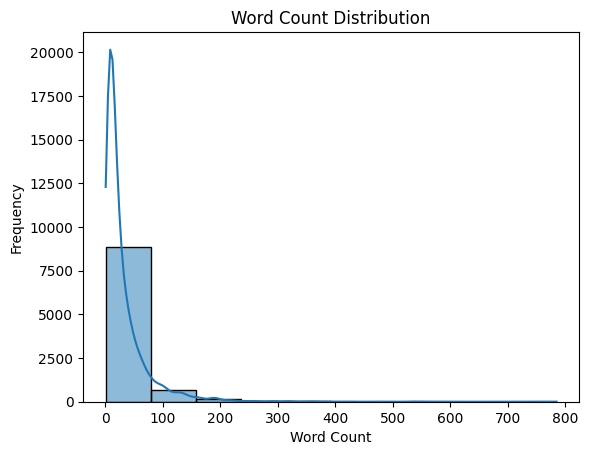

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df_aspect['word_count'], bins=10, kde=True)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

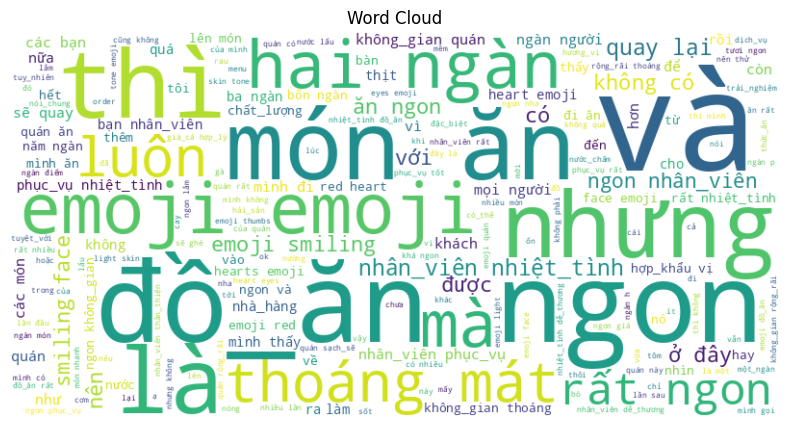

In [ ]:
def plot_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud')
    plt.show()

plot_wordcloud(df_aspect['clean_cmt'])

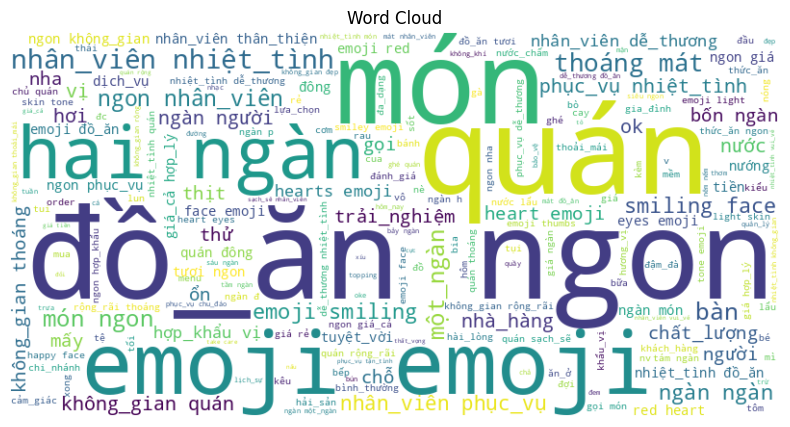

In [ ]:
def plot_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud')
    plt.show()

plot_wordcloud(df_aspect_stopwords['clean_cmt'])


Most Common Words:
 [('ngon', 6897), ('ăn', 5685), ('emoji', 5366), ('quán', 5191), ('mình', 5027), ('ngàn', 4964), ('và', 4680), ('không', 4530), ('có', 4305), ('món', 4255)]


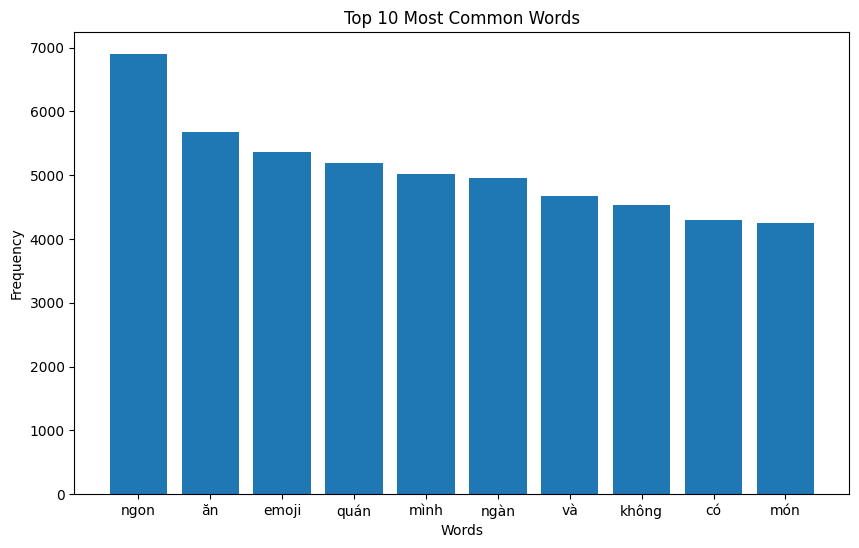

In [ ]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer()
word_counts = vectorizer.fit_transform(df_aspect['clean_cmt'])

# Most Common Words
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts.toarray().sum(axis=0)))
common_words = Counter(word_freq).most_common(10)
print("\nMost Common Words:\n", common_words)

# Plot Most Common Words
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))  # Width=10, Height=6
plt.bar(words, counts)
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


Most Common Words:
 [('ngon', 6988), ('ngàn', 5678), ('emoji', 5656), ('quán', 5209), ('đồ_ăn', 4280), ('món', 4263), ('nhân_viên', 3954), ('nhiệt_tình', 2488), ('phục_vụ', 2418), ('không_gian', 2356)]


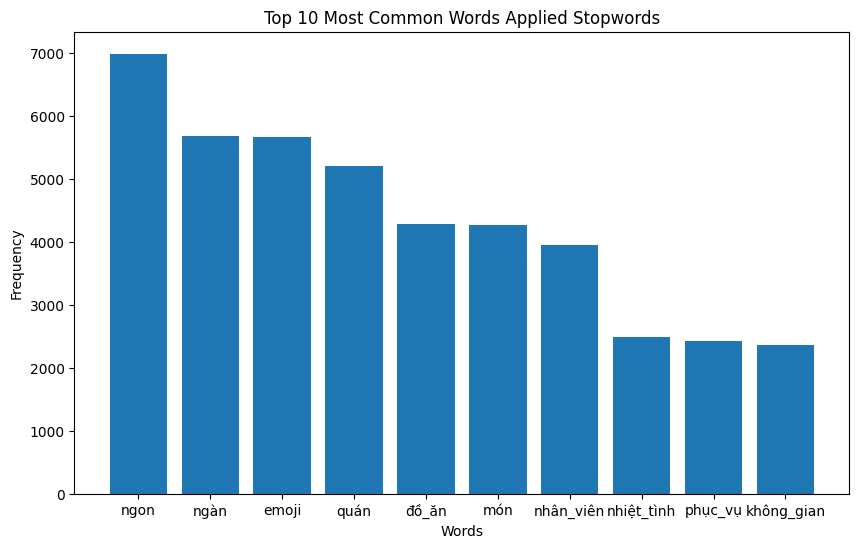

In [ ]:
word_counts = vectorizer.fit_transform(df_aspect_stopwords['clean_cmt'])

# Most Common Words
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts.toarray().sum(axis=0)))
common_words = Counter(word_freq).most_common(10)
print("\nMost Common Words:\n", common_words)

# Plot Most Common Words
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))  # Width=10, Height=6
plt.bar(words, counts)
plt.title('Top 10 Most Common Words Applied Stopwords')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

## Group by restaurant

In [ ]:
df_aspect.columns

Index(['place_id', 'name', 'status', 'location', 'overall_rating', 'price',
       'rating', 'review_time', 'comment', 'street_number', 'route', 'area',
       'a_food', 'a_service', 'a_atmosphere', 'type', 'clean_cmt',
       'word_count', 'char_count', 'unique_word_count'],
      dtype='object')

In [ ]:
grouped = df_aspect.groupby('place_id').agg({
    'clean_cmt': " ".join,
    'comment': ['count'],
    'a_food': ['mean'],
    'a_service': ['mean'],
    'a_atmosphere': ['mean'],
}).reset_index()

grouped.columns = ['restaurant','combined_text', 'no_review', 'avg_food', 'avg_service', 'avg_atmosphere']

print("\nGrouped Data:\n", grouped)


Grouped Data:
                       restaurant  \
0    ChIJ-03wYwMrdTER-1NElD9XLEg   
1    ChIJ-0VLn8sudTERGw-MW05RZS4   
2    ChIJ-9b8dxcpdTERjMs-TwixO_0   
3    ChIJ-ZE4DgApdTERS0vMWv7kdJQ   
4    ChIJ-b_0ApQpdTEReFcT97UuxpQ   
..                           ...   
295  ChIJzUFM6ckpdTERbKUvZPYkiS8   
296  ChIJzVsCV7UrdTERnW90-6kuG0w   
297  ChIJzYZL4ZwpdTERh8jCEz4sGTw   
298  ChIJz_KhzQkvdTERgivBct5H2SA   
299  ChIJzaJXIicpdTERv6c03kdf_KA   

                                         combined_text  no_review  avg_food  \
0    quán bán bingsu với đá bào siu ngon giá cũng s...         18  4.722222   
1    một_ngàn quán bùn bò rộng thoáng mái nằm trong...         13  3.846154   
2    lần đầu_tiên được trải_nghiệm thức_ăn nhanh tạ...         20  4.900000   
3    đầu_tiên thì khen không_gian quán thoáng mát r...         31  4.612903   
4    hôm trước mình có dịp ghé qua quán gánh đậu tr...         28  4.321429   
..                                                 ...        ...       ...  

<ipython-input-123-6cfa41435e10>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='restaurant', y='no_review', data=top_restaurants, palette='viridis')


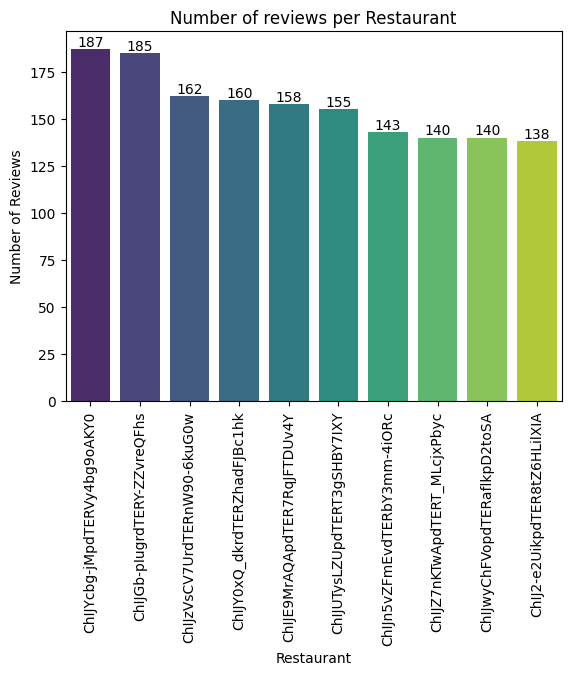

In [ ]:
# Assuming grouped is already defined and sorted as shown
top_restaurants = grouped.sort_values(by="no_review", ascending=False).head(10)

# Create the bar plot
sns.barplot(x='restaurant', y='no_review', data=top_restaurants, palette='viridis')
plt.title('Number of reviews per Restaurant')
plt.xticks(rotation=90)
plt.xlabel('Restaurant')
plt.ylabel('Number of Reviews')

# Add labels to the bars
for i, bar in enumerate(plt.gca().patches):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.show()

In [ ]:
def calculate_text_stats(text):
    words = word_tokenize(text)
    return len(words), len(text), len(set(words))

grouped['word_count'], grouped['char_count'], grouped['unique_word_count'] = zip(*grouped['combined_text'].apply(calculate_text_stats))

print("\nAggregated Text Statistics:\n", grouped[['restaurant', 'word_count', 'char_count', 'unique_word_count']])


Aggregated Text Statistics:
                       restaurant  word_count  char_count  unique_word_count
0    ChIJ-03wYwMrdTER-1NElD9XLEg         781        3949                346
1    ChIJ-0VLn8sudTERGw-MW05RZS4         451        2322                220
2    ChIJ-9b8dxcpdTERjMs-TwixO_0         661        3528                241
3    ChIJ-ZE4DgApdTERS0vMWv7kdJQ         761        4496                388
4    ChIJ-b_0ApQpdTEReFcT97UuxpQ        1658        8937                624
..                           ...         ...         ...                ...
295  ChIJzUFM6ckpdTERbKUvZPYkiS8         569        3072                311
296  ChIJzVsCV7UrdTERnW90-6kuG0w        2851       16496                661
297  ChIJzYZL4ZwpdTERh8jCEz4sGTw         707        3790                325
298  ChIJz_KhzQkvdTERgivBct5H2SA         535        2868                260
299  ChIJzaJXIicpdTERv6c03kdf_KA         736        4288                347

[300 rows x 4 columns]
